# 911 Calls Capstone Project

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [2]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Top 5 zipcodes for 911 calls

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### Top 5 townships (twp) for 911 calls

In [36]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### How many unique title codes are there?

In [39]:
df['title'].nunique()

110

### Creating new columns from exiting ones

The "title" column has Reasons/Departments. Let's split it up to a new column called Reason.

In [13]:
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [8]:
x = df['title'].iloc[0]

x

'EMS: BACK PAINS/INJURY'

In [9]:
x.split(':')[0]

'EMS'

In [10]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [12]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

### What is the most common Reason for a 911 call based off of this new column?

In [16]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Using seaborn to create a countplot of 911 calls by Reason.

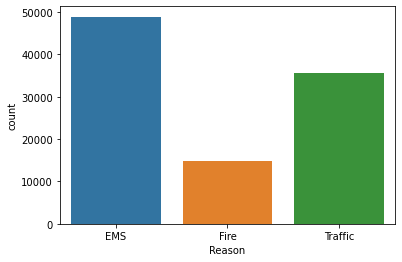

In [19]:
sns.countplot(x='Reason', data = df)
plt.show()

___
### What is the data type of the objects in the timeStamp column?

In [20]:
type(df['timeStamp'].iloc[0])

str

### Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [21]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

### Let's create some new columns that displays Hour, Month, and Day of Week.

In [22]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['dayofweek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

### Day of Week is an integer from 0-6. Let change that to the the actual names of the week in strings

In [28]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [30]:
df['dayofweek'] = df['dayofweek'].map(dmap)

In [32]:
df['dayofweek']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: dayofweek, Length: 99492, dtype: object

### Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. 

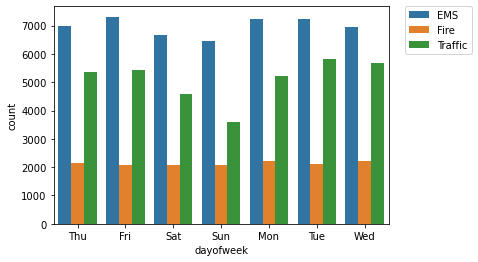

In [36]:
sns.countplot(x='dayofweek', data=df, hue='Reason')

# Moving the legend out of the way.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Now do the same for Month:**

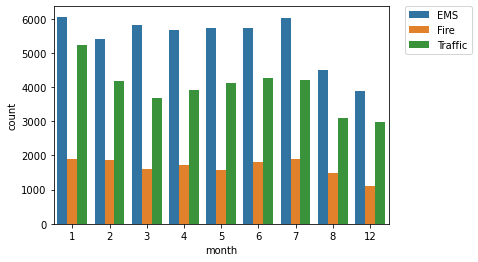

In [37]:
sns.countplot(x='month', data=df, hue='Reason')

# Moving the legend out of the way.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### There are missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas.

Let's create a groupby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation.

In [39]:
byMonth = df.groupby('month').count()

In [40]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,dayofweek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


### Simple plot off of the dataframe indicating the count of calls per month.

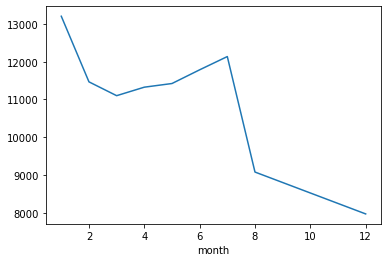

In [45]:
byMonth['lat'].plot()

plt.show()

### Using seaborn's lmplot() to create a linear fit on the number of calls per month.

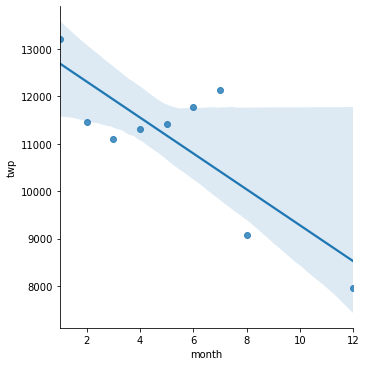

In [48]:
sns.lmplot(x='month', y='twp', data=byMonth.reset_index())

### Creating a new column called 'Date' that contains the date from the timeStamp column.

In [62]:
t = df['timeStamp'].iloc[0]

In [63]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [64]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


### Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

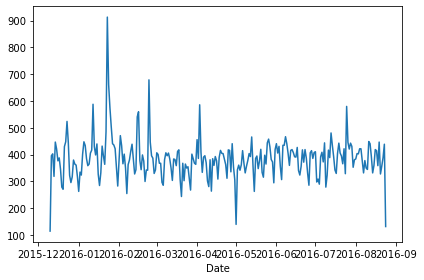

In [71]:
df.groupby('Date').count()['lat'].plot()

plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

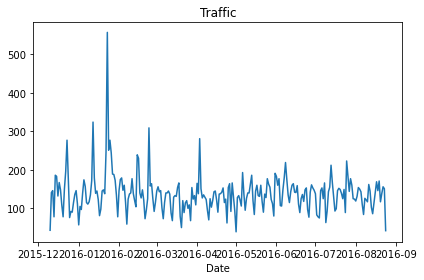

In [74]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()

plt.title('Traffic')
plt.tight_layout()

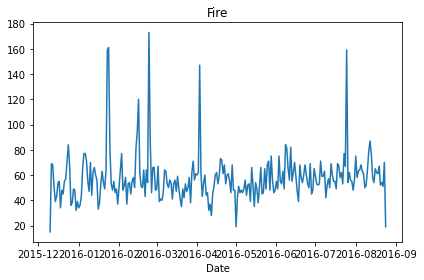

In [76]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()

plt.title('Fire')
plt.tight_layout()

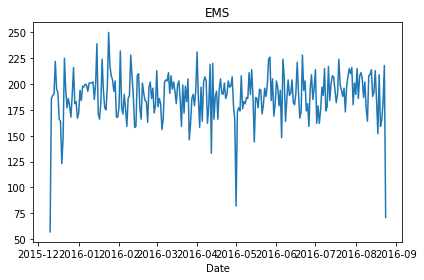

In [77]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()

plt.title('EMS')
plt.tight_layout()

### Let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [84]:
DayHour = df.groupby(by=['dayofweek', 'hour']).count()['Reason'].unstack()

### Creating a heatmap with the new df

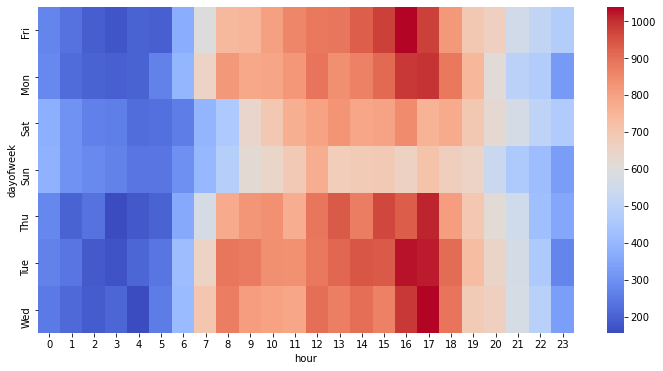

In [91]:
plt.figure(figsize=(12,6))
sns.heatmap(DayHour, cmap='coolwarm')
plt.show()


### clustermap

<Figure size 864x432 with 0 Axes>

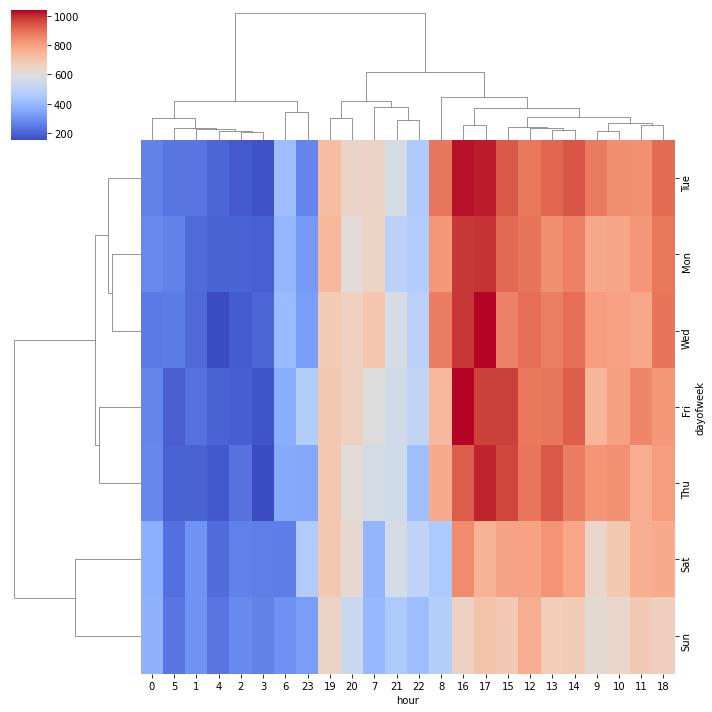

In [92]:
plt.figure(figsize=(12,6))
sns.clustermap(DayHour, cmap='coolwarm')
plt.show()

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [93]:
DayMonth = df.groupby(by=['dayofweek', 'month']).count()['Reason'].unstack()

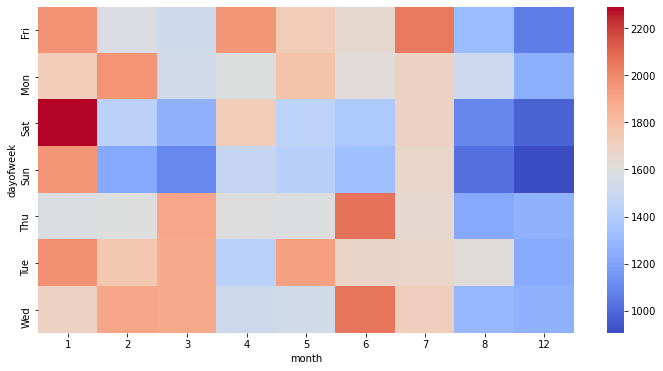

In [96]:
plt.figure(figsize=(12,6))
sns.heatmap(DayMonth, cmap='coolwarm')
plt.show()

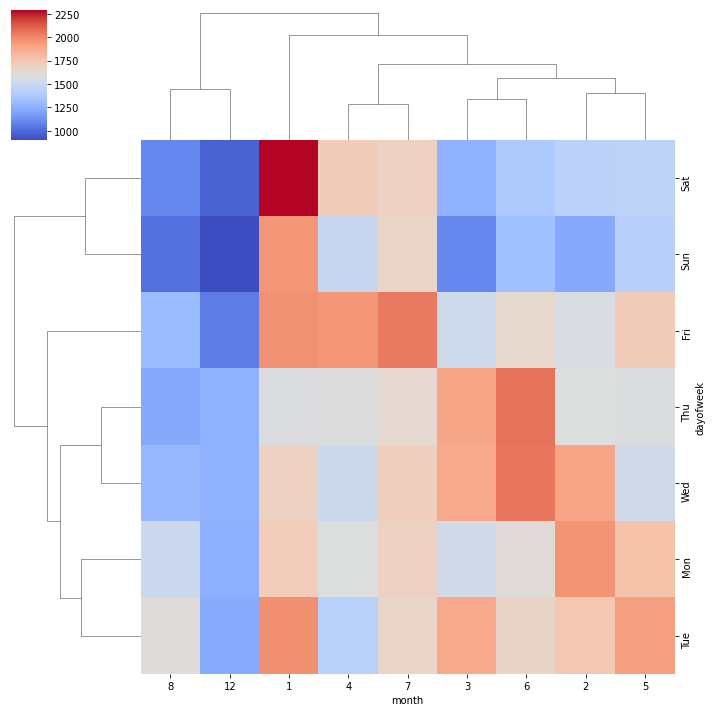

In [99]:
sns.clustermap(DayMonth, cmap='coolwarm')
plt.show()